In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

def load_timeseries_data():
    try:
        n100_ts = pd.read_csv('NASDAQ100_strategy_timeseries.csv')
        print(f"N100 Zeitreihen geladen: {n100_ts.shape}")
        
        f100_ts = pd.read_csv('FTSE100_strategy_timeseries.csv')
        print(f"F100 Zeitreihen geladen: {f100_ts.shape}")
        
        return n100_ts, f100_ts
        
    except FileNotFoundError as e:
        print(f"Datei nicht gefunden: {e}")
        return None, None

n100_timeseries, f100_timeseries = load_timeseries_data()

if n100_timeseries is not None:
    print("\n=== NASDAQ-100 Zeitreihen ===")
    print(n100_timeseries.head())
    print(f"Spalten: {list(n100_timeseries.columns)}")

if f100_timeseries is not None:
    print("\n=== FTSE-100 Zeitreihen ===")
    print(f100_timeseries.head())
    print(f"Spalten: {list(f100_timeseries.columns)}")

N100 Zeitreihen geladen: (2159, 13)
F100 Zeitreihen geladen: (2161, 13)

=== NASDAQ-100 Zeitreihen ===
   available_capital  invested_capital  total_capital  daily_pnl  daily_costs  \
0       94135.430318       5851.664717   99987.095036        0.0    12.904964   
1       92257.945900       7724.938673   99982.884572        0.0     4.210463   
2       90417.867286       9560.850910   99978.718196        0.0     4.166376   
3       85114.687726      14851.787165   99966.474891        0.0    12.243305   
4       85114.687726      14851.787165   99966.474891        0.0     0.000000   

   active_positions  cumulative_pnl  cumulative_costs  net_performance  \
0               6.0             0.0         12.904964       -12.904964   
1               8.0             0.0         17.115428       -17.115428   
2              10.0             0.0         21.281804       -21.281804   
3              16.0             0.0         33.525109       -33.525109   
4              16.0             0.0     

In [3]:
def prepare_equity_data(n100_ts, f100_ts):
    combined_ts = pd.concat([n100_ts, f100_ts], ignore_index=True)
    
    def extract_approach(strategy_name):
        if 'Cluster' in strategy_name:
            return 'Affinity Propagation'
        elif 'CoInt' in strategy_name:
            return 'Kointegration'
        elif 'GradientBoost' in strategy_name:
            return 'Gradient Boost'
        else:
            return strategy_name
    
    combined_ts['approach'] = combined_ts['strategy'].apply(extract_approach)
    combined_ts['date'] = pd.to_datetime(combined_ts['date'])
    
    return combined_ts

if n100_timeseries is not None and f100_timeseries is not None:
    equity_data = prepare_equity_data(n100_timeseries, f100_timeseries)
    
    print("=== Aufbereitete Equity Daten ===")
    print(f"Zeitraum: {equity_data['date'].min()} bis {equity_data['date'].max()}")
    print(f"Ansätze: {list(equity_data['approach'].unique())}")
    print(f"Märkte: {list(equity_data['market'].unique())}")
    print(f"Strategien: {list(equity_data['strategy'].unique())}")
    print(f"\nAnzahl Datenpunkte: {len(equity_data)}")
    
    print("\n=== Sample Daten ===")
    print(equity_data[['date', 'approach', 'market', 'performance_pct', 'cumulative_pnl']].head(10))
else:
    print("Keine Daten zum Aufbereiten verfügbar")

=== Aufbereitete Equity Daten ===
Zeitraum: 2024-01-02 00:00:00 bis 2024-12-31 00:00:00
Ansätze: ['Affinity Propagation', 'Kointegration', 'Gradient Boost']
Märkte: ['NASDAQ100', 'FTSE100']
Strategien: ['Cluster_Bollinger_Sliding', 'Cluster_Z-Score_Sliding', 'CoInt_Bollinger_Sliding', 'CoInt_Z-Score_Sliding', 'GradientBoost_Bollinger_Sliding', 'GradientBoost_Z-Score_Sliding']

Anzahl Datenpunkte: 4320

=== Sample Daten ===
        date              approach     market  performance_pct  cumulative_pnl
0 2024-01-02  Affinity Propagation  NASDAQ100        -0.000129        0.000000
1 2024-01-03  Affinity Propagation  NASDAQ100        -0.000171        0.000000
2 2024-01-04  Affinity Propagation  NASDAQ100        -0.000213        0.000000
3 2024-01-05  Affinity Propagation  NASDAQ100        -0.000335        0.000000
4 2024-01-06  Affinity Propagation  NASDAQ100        -0.000335        0.000000
5 2024-01-07  Affinity Propagation  NASDAQ100        -0.000335        0.000000
6 2024-01-08  Affini

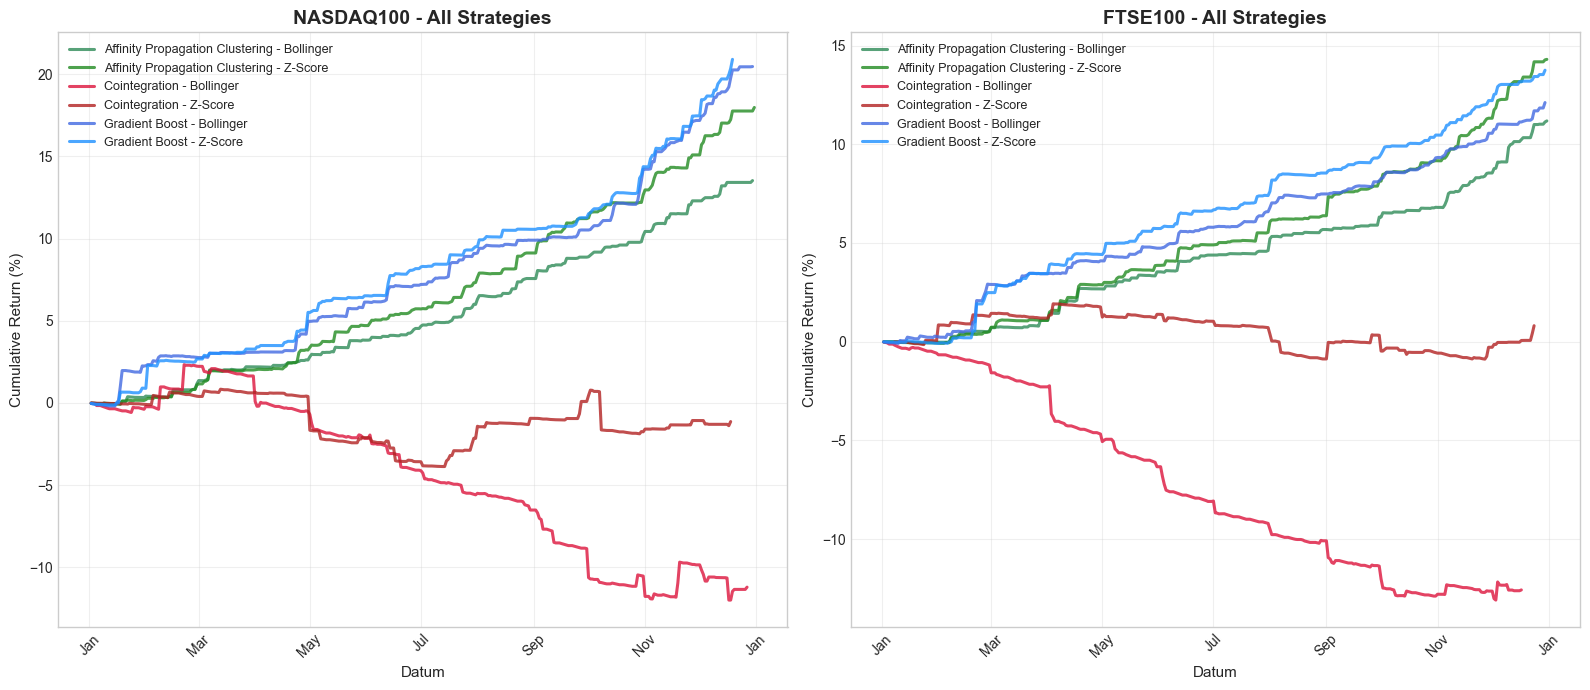


=== Final Performance by Strategy ===
                                           Final Return (%)
market    strategy                                         
FTSE100   Cluster_Bollinger_Sliding                   11.18
          Cluster_Z-Score_Sliding                     14.30
          CoInt_Bollinger_Sliding                    -12.57
          CoInt_Z-Score_Sliding                        0.81
          GradientBoost_Bollinger_Sliding             12.11
          GradientBoost_Z-Score_Sliding               13.75
NASDAQ100 Cluster_Bollinger_Sliding                   13.53
          Cluster_Z-Score_Sliding                     17.98
          CoInt_Bollinger_Sliding                    -11.21
          CoInt_Z-Score_Sliding                       -1.13
          GradientBoost_Bollinger_Sliding             20.47
          GradientBoost_Z-Score_Sliding               20.90


In [6]:
import matplotlib.dates as mdates

def create_equity_curves_by_market(equity_data):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
    
    colors = {
        'Cluster_Bollinger_Sliding': '#2E8B57',
        'Cluster_Z-Score_Sliding': '#228B22', 
        'CoInt_Bollinger_Sliding': '#DC143C',
        'CoInt_Z-Score_Sliding': '#B22222',
        'GradientBoost_Bollinger_Sliding': '#4169E1',
        'GradientBoost_Z-Score_Sliding': '#1E90FF'
    }
    
    strategy_labels = {
        'Cluster_Bollinger_Sliding': 'Affinity Propagation Clustering - Bollinger',
        'Cluster_Z-Score_Sliding': 'Affinity Propagation Clustering - Z-Score',
        'CoInt_Bollinger_Sliding': 'Cointegration - Bollinger', 
        'CoInt_Z-Score_Sliding': 'Cointegration - Z-Score',
        'GradientBoost_Bollinger_Sliding': 'Gradient Boost - Bollinger',
        'GradientBoost_Z-Score_Sliding': 'Gradient Boost - Z-Score'
    }
    
    markets = ['NASDAQ100', 'FTSE100']
    axes = [ax1, ax2]
    
    for i, market in enumerate(markets):
        ax = axes[i]
        
        for strategy in equity_data['strategy'].unique():
            subset = equity_data[(equity_data['strategy'] == strategy) & 
                               (equity_data['market'] == market)]
            
            if len(subset) > 0:
                daily_perf = subset.groupby('date')['performance_pct'].first().reset_index()
                daily_perf = daily_perf.sort_values('date')
                
                ax.plot(daily_perf['date'], daily_perf['performance_pct'] * 100,
                       color=colors[strategy], linewidth=2.2, alpha=0.8,
                       label=strategy_labels[strategy])
        
        ax.set_title(f'{market} - All Strategies', fontsize=14, fontweight='bold')
        ax.set_xlabel('Datum', fontsize=11)
        ax.set_ylabel('Cumulative Return (%)', fontsize=11)
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=9)
        
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
    

    plt.tight_layout()
    return fig, ax1, ax2

if 'equity_data' in locals():
    fig, ax1, ax2 = create_equity_curves_by_market(equity_data)
    plt.show()
    
    print("\n=== Final Performance by Strategy ===")
    final_perf = equity_data.groupby(['market', 'strategy']).agg({
        'performance_pct': 'last'
    }).round(4)
    final_perf['performance_pct'] = (final_perf['performance_pct'] * 100).round(2)
    final_perf.columns = ['Final Return (%)']
    print(final_perf)
else:
    print("equity_data nicht verfügbar")

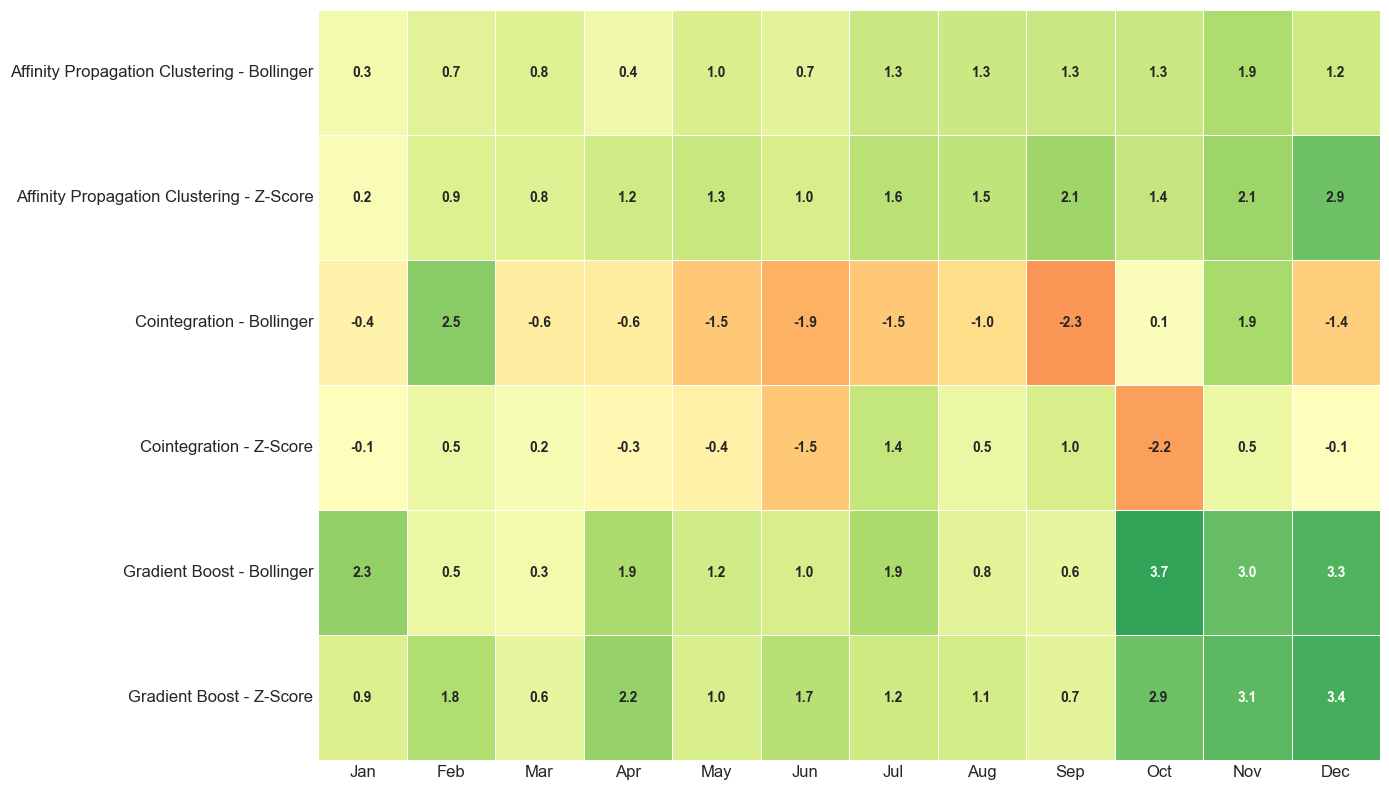

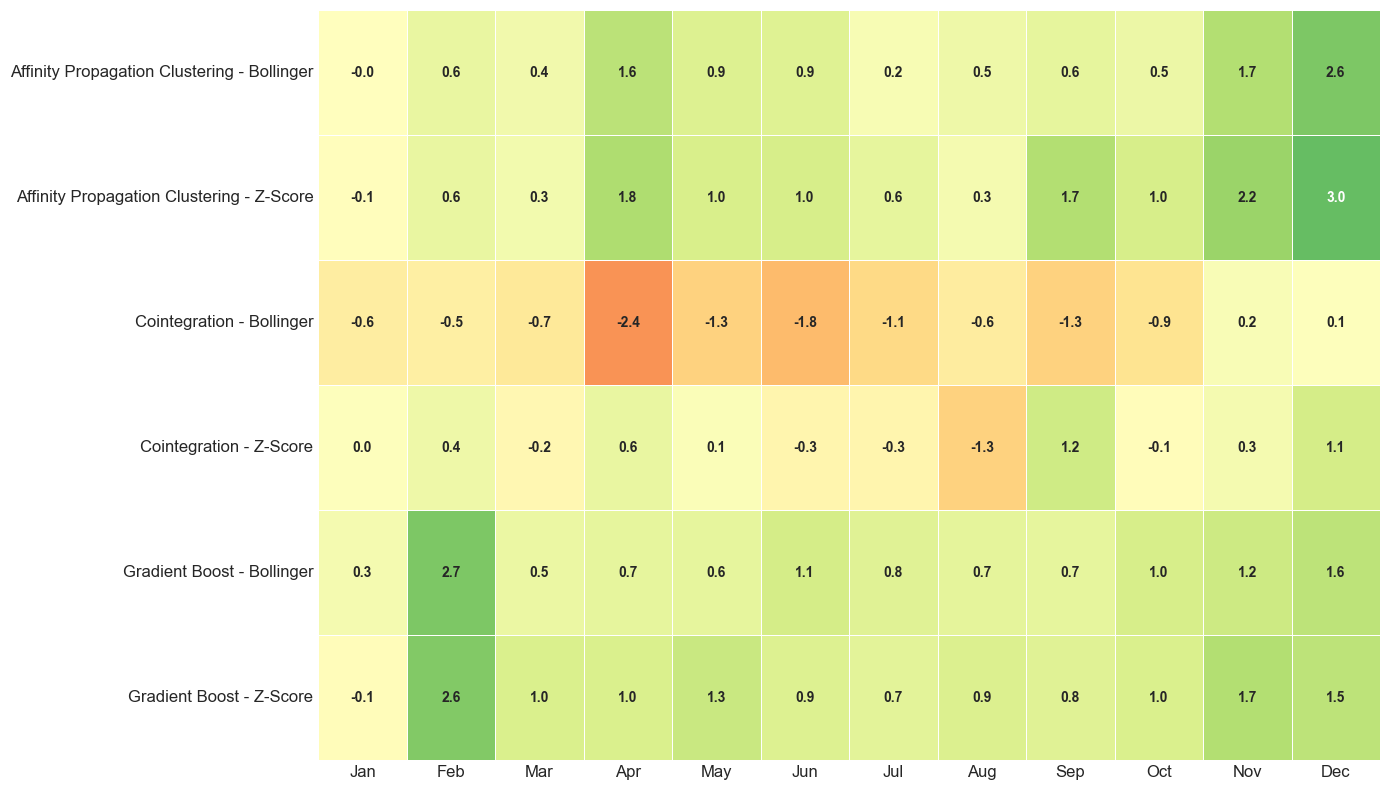


=== 📈 Monthly Performance Analysis ===

📊 Complete Monthly Performance Matrix:

🎯 NASDAQ100:
--------------------------------------------------

Affinity Propagation Clustering - Bollinger:
  Jan:  +0.3% 🟢  Feb:  +0.7% 🟢  Mar:  +0.8% 🟢  Apr:  +0.4% 🟢  May:  +1.0% 🟢  Jun:  +0.7% 🟢  Jul:  +1.3% 🟢  Aug:  +1.3% 🟢  Sep:  +1.3% 🟢  Oct:  +1.3% 🟢  Nov:  +1.9% 🟢  Dec:  +1.2% 🟢  

Affinity Propagation Clustering - Z-Score:
  Jan:  +0.2% 🟢  Feb:  +0.9% 🟢  Mar:  +0.8% 🟢  Apr:  +1.2% 🟢  May:  +1.3% 🟢  Jun:  +1.0% 🟢  Jul:  +1.6% 🟢  Aug:  +1.5% 🟢  Sep:  +2.1% 🟢  Oct:  +1.4% 🟢  Nov:  +2.1% 🟢  Dec:  +2.9% 🟢  

Cointegration - Bollinger:
  Jan:  -0.4% 🔴  Feb:  +2.5% 🟢  Mar:  -0.6% 🔴  Apr:  -0.6% 🔴  May:  -1.5% 🔴  Jun:  -1.9% 🔴  Jul:  -1.5% 🔴  Aug:  -1.0% 🔴  Sep:  -2.4% 🔴  Oct:  +0.1% 🟢  Nov:  +1.9% 🟢  Dec:  -1.4% 🔴  

Cointegration - Z-Score:
  Jan:  -0.1% 🔴  Feb:  +0.5% 🟢  Mar:  +0.2% 🟢  Apr:  -0.3% 🔴  May:  -0.5% 🔴  Jun:  -1.5% 🔴  Jul:  +1.4% 🟢  Aug:  +0.5% 🟢  Sep:  +1.0% 🟢  Oct:  -2.2% 🔴  Nov:  +0.5

In [8]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import pandas as pd
import numpy as np

def create_monthly_heatmap_single(equity_data, market):
    # Ein Diagramm pro Markt
    fig, ax = plt.subplots(1, 1, figsize=(14, 8))
    
    equity_data['month'] = equity_data['date'].dt.month
    equity_data['month_name'] = equity_data['date'].dt.strftime('%b')
    
    # Strategienamen
    strategy_labels = {
        'Cluster_Bollinger_Sliding': 'Affinity Propagation Clustering - Bollinger',
        'Cluster_Z-Score_Sliding': 'Affinity Propagation Clustering - Z-Score',
        'CoInt_Bollinger_Sliding': 'Cointegration - Bollinger', 
        'CoInt_Z-Score_Sliding': 'Cointegration - Z-Score',
        'GradientBoost_Bollinger_Sliding': 'Gradient Boost - Bollinger',
        'GradientBoost_Z-Score_Sliding': 'Gradient Boost - Z-Score'
    }
    
    # Englische Monatsnamen
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    market_data = equity_data[equity_data['market'] == market]
    
    monthly_returns = []
    for strategy in market_data['strategy'].unique():
        strategy_data = market_data[market_data['strategy'] == strategy]
        
        monthly_perf = strategy_data.groupby('month').agg({
            'performance_pct': lambda x: x.iloc[-1] - x.iloc[0] if len(x) > 1 else 0
        }).reset_index()
        
        monthly_perf['strategy'] = strategy_labels[strategy]
        monthly_returns.append(monthly_perf)
    
    if monthly_returns:
        monthly_df = pd.concat(monthly_returns, ignore_index=True)
        
        # Pivot für Heatmap
        heatmap_data = monthly_df.pivot(index='strategy', columns='month', 
                                      values='performance_pct').fillna(0)
        heatmap_data = heatmap_data * 100  # Convert to percentage
        
        # Schöne seaborn Heatmap
        sns.heatmap(heatmap_data, 
                   annot=True,                    # Werte anzeigen
                   fmt='.1f',                     # Format für Werte
                   cmap='RdYlGn',                 # Farbschema
                   center=0,                      # Zentriert um 0
                   square=False,                  # Rechteckige Zellen
                   linewidths=0.5,                # Linien zwischen Zellen
                   linecolor='white',             # Weiße Linien
                   cbar=False,                    # Keine Colorbar
                   ax=ax,
                   annot_kws={'size': 10, 'weight': 'bold'},  # Text-Styling
                   vmin=-5, vmax=5)               # Feste Grenzen
        
        # Achsen-Styling
        ax.set_xticklabels(month_names[:len(heatmap_data.columns)], 
                          rotation=0, fontsize=12, fontweight='medium')
        ax.set_yticklabels(heatmap_data.index, 
                          rotation=0, fontsize=12, fontweight='medium')
        
        # Keine Labels
        ax.set_xlabel('')
        ax.set_ylabel('')
    
    plt.tight_layout()
    return fig

# Verwendung - Zwei separate Diagramme
if 'equity_data' in locals():
    # NASDAQ100 Heatmap
    fig1 = create_monthly_heatmap_single(equity_data, 'NASDAQ100')
    plt.show()
    
    # FTSE100 Heatmap  
    fig2 = create_monthly_heatmap_single(equity_data, 'FTSE100')
    plt.show()
    
    print("\n=== 📈 Monthly Performance Analysis ===")
    equity_data['month'] = equity_data['date'].dt.month
    monthly_summary = equity_data.groupby(['strategy', 'market', 'month']).agg({
        'performance_pct': lambda x: (x.iloc[-1] - x.iloc[0]) * 100 if len(x) > 1 else 0
    }).round(2)
    monthly_summary.columns = ['Monthly Return (%)']
    
    # Strategienamen für bessere Lesbarkeit
    strategy_labels = {
        'Cluster_Bollinger_Sliding': 'Affinity Propagation Clustering - Bollinger',
        'Cluster_Z-Score_Sliding': 'Affinity Propagation Clustering - Z-Score',
        'CoInt_Bollinger_Sliding': 'Cointegration - Bollinger', 
        'CoInt_Z-Score_Sliding': 'Cointegration - Z-Score',
        'GradientBoost_Bollinger_Sliding': 'Gradient Boost - Bollinger',
        'GradientBoost_Z-Score_Sliding': 'Gradient Boost - Z-Score'
    }
    
    month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                   7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
    
    # Alle monatlichen Werte anzeigen
    print("\n📊 Complete Monthly Performance Matrix:")
    print("="*80)
    
    for market in ['NASDAQ100', 'FTSE100']:
        print(f"\n🎯 {market}:")
        print("-" * 50)
        
        for strategy_orig in equity_data['strategy'].unique():
            strategy_name = strategy_labels.get(strategy_orig, strategy_orig)
            print(f"\n{strategy_name}:")
            
            strategy_data = monthly_summary.loc[strategy_orig, market] if (strategy_orig, market) in monthly_summary.index else pd.DataFrame()
            
            if not strategy_data.empty:
                month_line = "  "
                for month in range(1, 13):
                    if month in strategy_data.index:
                        value = strategy_data.loc[month, 'Monthly Return (%)']
                        color_indicator = "🟢" if value > 0 else "🔴" if value < 0 else "⚪"
                        month_line += f"{month_names[month]}: {value:+5.1f}% {color_indicator}  "
                    else:
                        month_line += f"{month_names[month]}: ----   "
                print(month_line)
    
    # Zusätzliche Statistiken
    print("\n" + "="*80)
    print("📈 Summary Statistics:")
    print("="*80)
    
    print("\n🏆 Best Monthly Performance:")
    best_performance = monthly_summary.groupby(['strategy', 'market']).max()
    for (strategy, market), value in best_performance.iterrows():
        strategy_name = strategy_labels.get(strategy, strategy)
        print(f"  {strategy_name} ({market}): {value.iloc[0]:+.1f}%")
    
    print("\n📉 Worst Monthly Performance:")
    worst_performance = monthly_summary.groupby(['strategy', 'market']).min()
    for (strategy, market), value in worst_performance.iterrows():
        strategy_name = strategy_labels.get(strategy, strategy)
        print(f"  {strategy_name} ({market}): {value.iloc[0]:+.1f}%")
    
    print("\n📊 Average Monthly Performance:")
    avg_performance = monthly_summary.groupby(['strategy', 'market']).mean()
    for (strategy, market), value in avg_performance.iterrows():
        strategy_name = strategy_labels.get(strategy, strategy)
        print(f"  {strategy_name} ({market}): {value.iloc[0]:+.1f}%")
        
else:
    print("❌ equity_data not available")